<a href="https://colab.research.google.com/github/mariamalaa76/DCS-Data-Analysis-Crach-Course/blob/main/StudentPerformanceFactors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [174]:
! pip install squarify

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [176]:
data_path = '/content/StudentPerformanceFactors.csv'
df = pd.read_csv(data_path)
df.head()

,ID,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,...,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,1,23,84,Low,High,No,7,73,Low,Yes,...,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,2,19,64,Low,Medium,No,8,59,Low,Yes,...,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,3,24,98,Medium,Medium,Yes,7,91,Medium,Yes,...,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,4,29,89,Low,Medium,Yes,8,98,Medium,Yes,...,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,5,19,92,Medium,Medium,Yes,6,65,Medium,Yes,...,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [177]:
df.drop(columns=['ID'], inplace=True)
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [178]:
df.columns = df.columns.str.lower()
df.head()

,hours_studied,attendance,parental_involvement,access_to_resources,extracurricular_activities,sleep_hours,previous_scores,motivation_level,internet_access,tutoring_sessions,family_income,teacher_quality,school_type,peer_influence,physical_activity,learning_disabilities,parental_education_level,distance_from_home,gender,exam_score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [179]:
df.shape

(6607, 20)

In [180]:
df.columns

Index(['hours_studied', 'attendance', 'parental_involvement',
       'access_to_resources', 'extracurricular_activities', 'sleep_hours',
       'previous_scores', 'motivation_level', 'internet_access',
       'tutoring_sessions', 'family_income', 'teacher_quality', 'school_type',
       'peer_influence', 'physical_activity', 'learning_disabilities',
       'parental_education_level', 'distance_from_home', 'gender',
       'exam_score'],
      dtype='object')

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   hours_studied               6607 non-null   int64 
 1   attendance                  6607 non-null   int64 
 2   parental_involvement        6607 non-null   object
 3   access_to_resources         6607 non-null   object
 4   extracurricular_activities  6607 non-null   object
 5   sleep_hours                 6607 non-null   int64 
 6   previous_scores             6607 non-null   int64 
 7   motivation_level            6607 non-null   object
 8   internet_access             6607 non-null   object
 9   tutoring_sessions           6607 non-null   int64 
 10  family_income               6607 non-null   object
 11  teacher_quality             6529 non-null   object
 12  school_type                 6607 non-null   object
 13  peer_influence              6607 non-null   obje

In [182]:
df.describe()

,hours_studied,attendance,sleep_hours,previous_scores,tutoring_sessions,physical_activity,exam_score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [183]:
df['physical_activity'].unique()

array([3, 4, 2, 1, 5, 0, 6])

In [184]:
df['tutoring_sessions'].unique()

array([0, 2, 1, 3, 4, 5, 6, 7, 8])

In [185]:
df.describe(include='object')

,parental_involvement,access_to_resources,extracurricular_activities,motivation_level,internet_access,family_income,teacher_quality,school_type,peer_influence,learning_disabilities,parental_education_level,distance_from_home,gender
count,6607,6607,6607,6607,6607,6607,6529,6607,6607,6607,6517,6540,6607
unique,3,3,2,3,2,3,3,2,3,2,3,3,2
top,Medium,Medium,Yes,Medium,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
freq,3362,3319,3938,3351,6108,2672,3925,4598,2638,5912,3223,3884,3814


In [186]:
df.isnull().sum()

,0
hours_studied,0
attendance,0
parental_involvement,0
access_to_resources,0
extracurricular_activities,0
sleep_hours,0
previous_scores,0
motivation_level,0
internet_access,0
tutoring_sessions,0


In [187]:
df.dropna(subset = ['teacher_quality','parental_education_level','distance_from_home'],inplace=True)

In [188]:
df.isnull().sum()

,0
hours_studied,0
attendance,0
parental_involvement,0
access_to_resources,0
extracurricular_activities,0
sleep_hours,0
previous_scores,0
motivation_level,0
internet_access,0
tutoring_sessions,0


In [189]:
df.duplicated().sum()

0

In [192]:
df_num = df[['hours_studied','attendance','sleep_hours','previous_scores','tutoring_sessions','physical_activity','exam_score']]
df_num.head()

,hours_studied,attendance,sleep_hours,previous_scores,tutoring_sessions,physical_activity,exam_score
0,23,84,7,73,0,3,67
1,19,64,8,59,2,4,61
2,24,98,7,91,2,4,74
3,29,89,8,98,1,4,71
4,19,92,6,65,3,4,70


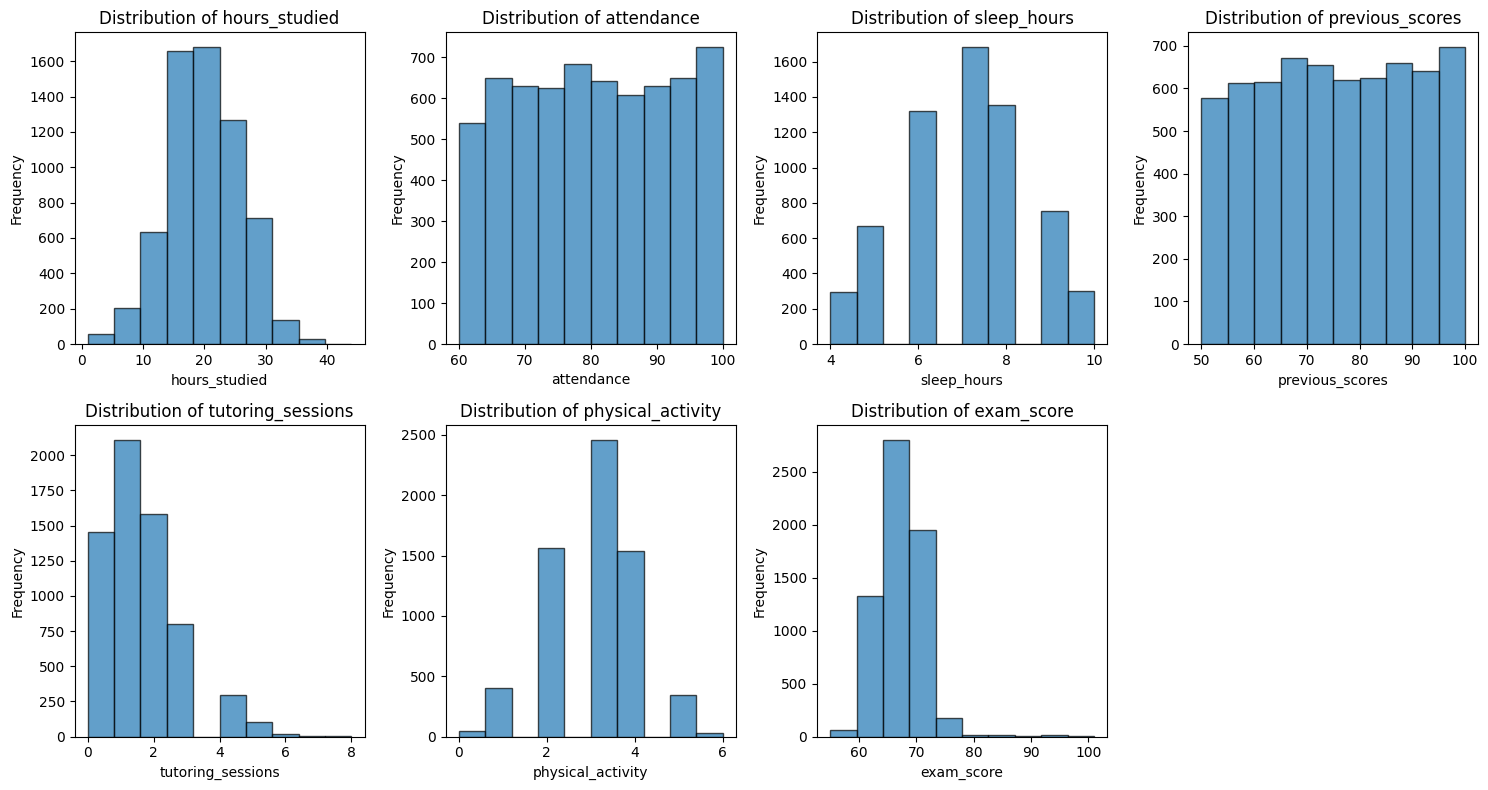

In [193]:
num_features = len(df_num.columns)
rows = 2
cols = (num_features + 1) // 2
fig, axes = plt.subplots(rows, cols, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(df_num.columns):
  axes[i].hist(df_num[col], bins=10, alpha=0.7, edgecolor='black')
  axes[i].set_title(f"Distribution of {col}")
  axes[i].set_xlabel(col)
  axes[i].set_ylabel("Frequency")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


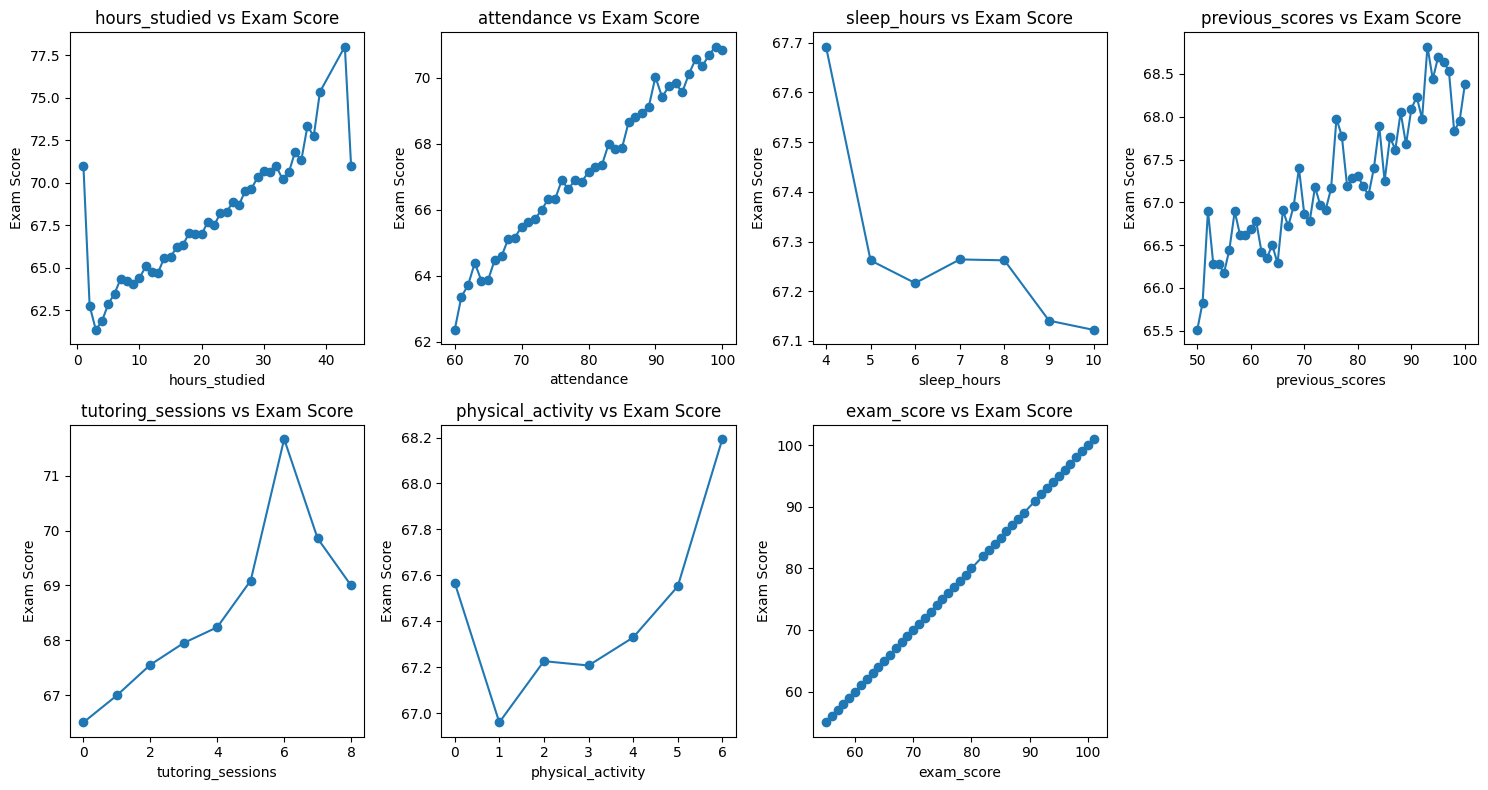

In [194]:
fig, axes = plt.subplots(rows, cols, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(df_num.columns):
    df.groupby(col)['exam_score'].mean().plot(ax=axes[i], kind='line', marker='o')
    axes[i].set_title(f"{col} vs Exam Score")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Exam Score")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


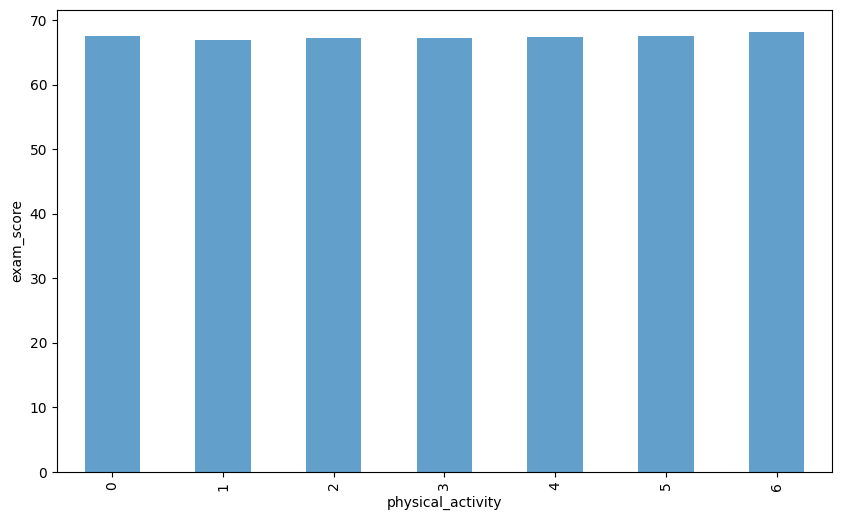

In [195]:
plt.figure(figsize=(10, 6))
df.groupby('physical_activity')['exam_score'].mean().plot(kind='bar', alpha=0.7)
plt.xlabel("physical_activity")
plt.ylabel("exam_score")
plt.show()

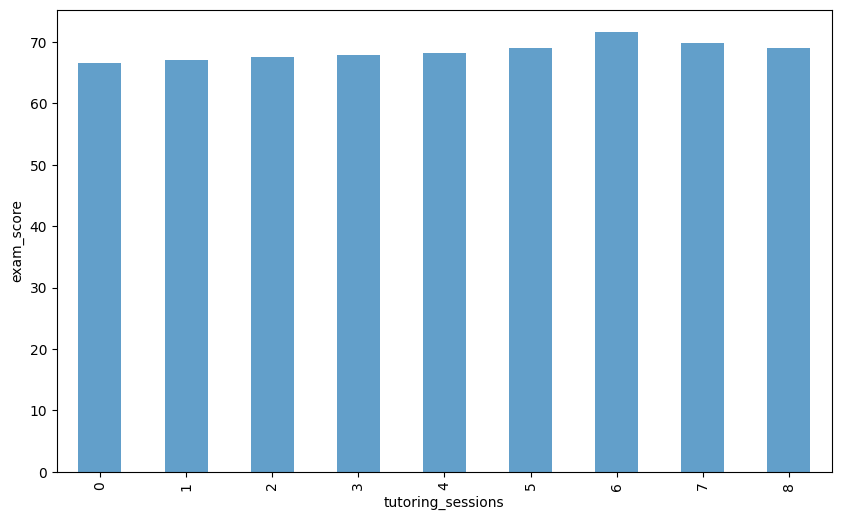

In [196]:
plt.figure(figsize=(10, 6))
df.groupby('tutoring_sessions')['exam_score'].mean().plot(kind='bar', alpha=0.7)
plt.xlabel("tutoring_sessions")
plt.ylabel("exam_score")
plt.show()

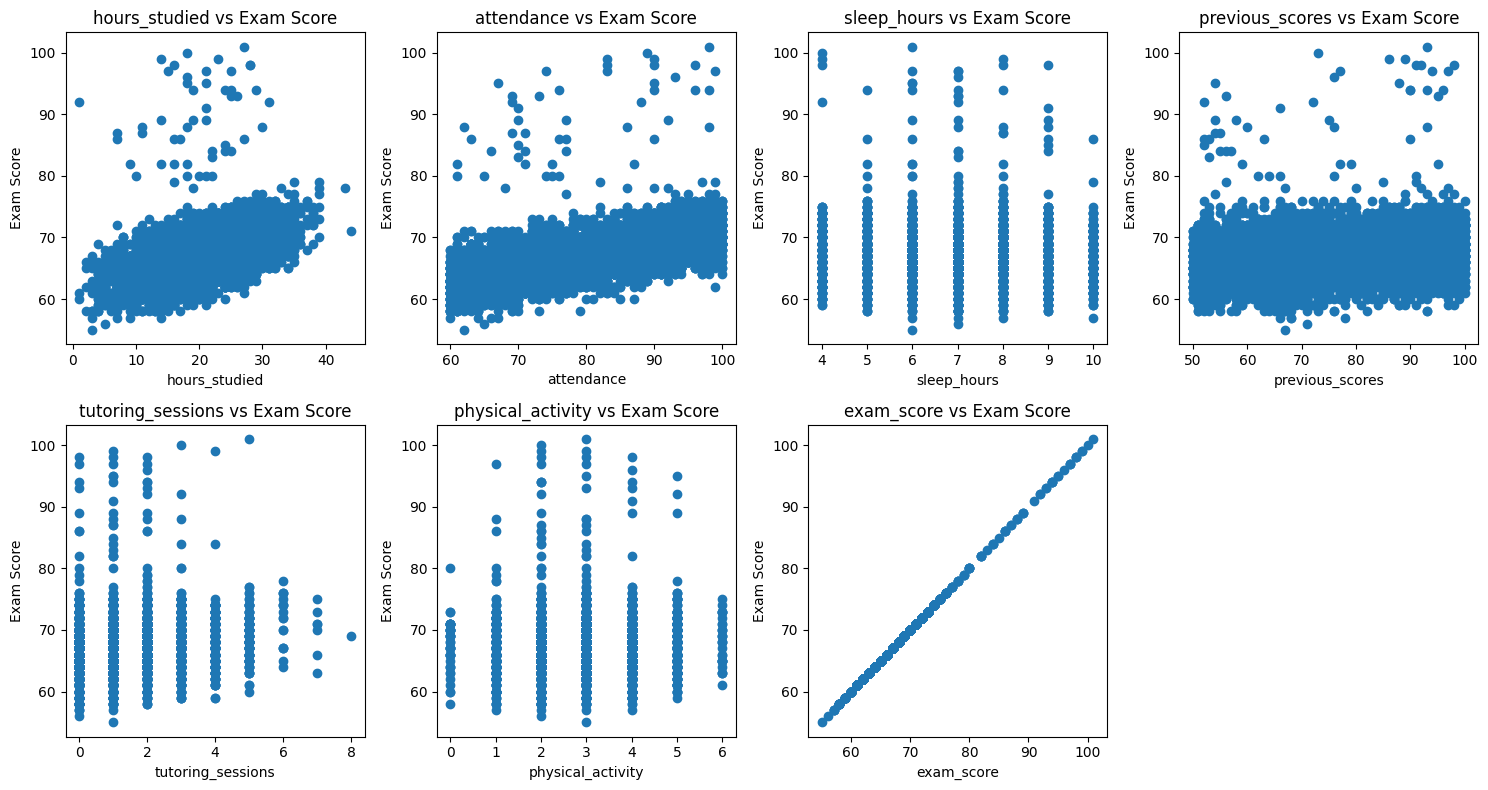

In [197]:
fig, axes = plt.subplots(rows, cols, figsize=(15, 8))
axes = axes.flatten()

for i, col in enumerate(df_num.columns):
    axes[i].scatter(df[col], df['exam_score'])
    axes[i].set_title(f"{col} vs Exam Score")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Exam Score")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [198]:
df_cat = df[['parental_involvement','access_to_resources','extracurricular_activities','motivation_level',
             'internet_access','family_income','teacher_quality','school_type','peer_influence','learning_disabilities',
             'parental_education_level','distance_from_home','gender','exam_score'
             ]]
df_cat.head()

,parental_involvement,access_to_resources,extracurricular_activities,motivation_level,internet_access,family_income,teacher_quality,school_type,peer_influence,learning_disabilities,parental_education_level,distance_from_home,gender,exam_score
0,Low,High,No,Low,Yes,Low,Medium,Public,Positive,No,High School,Near,Male,67
1,Low,Medium,No,Low,Yes,Medium,Medium,Public,Negative,No,College,Moderate,Female,61
2,Medium,Medium,Yes,Medium,Yes,Medium,Medium,Public,Neutral,No,Postgraduate,Near,Male,74
3,Low,Medium,Yes,Medium,Yes,Medium,Medium,Public,Negative,No,High School,Moderate,Male,71
4,Medium,Medium,Yes,Medium,Yes,Medium,High,Public,Neutral,No,College,Near,Female,70


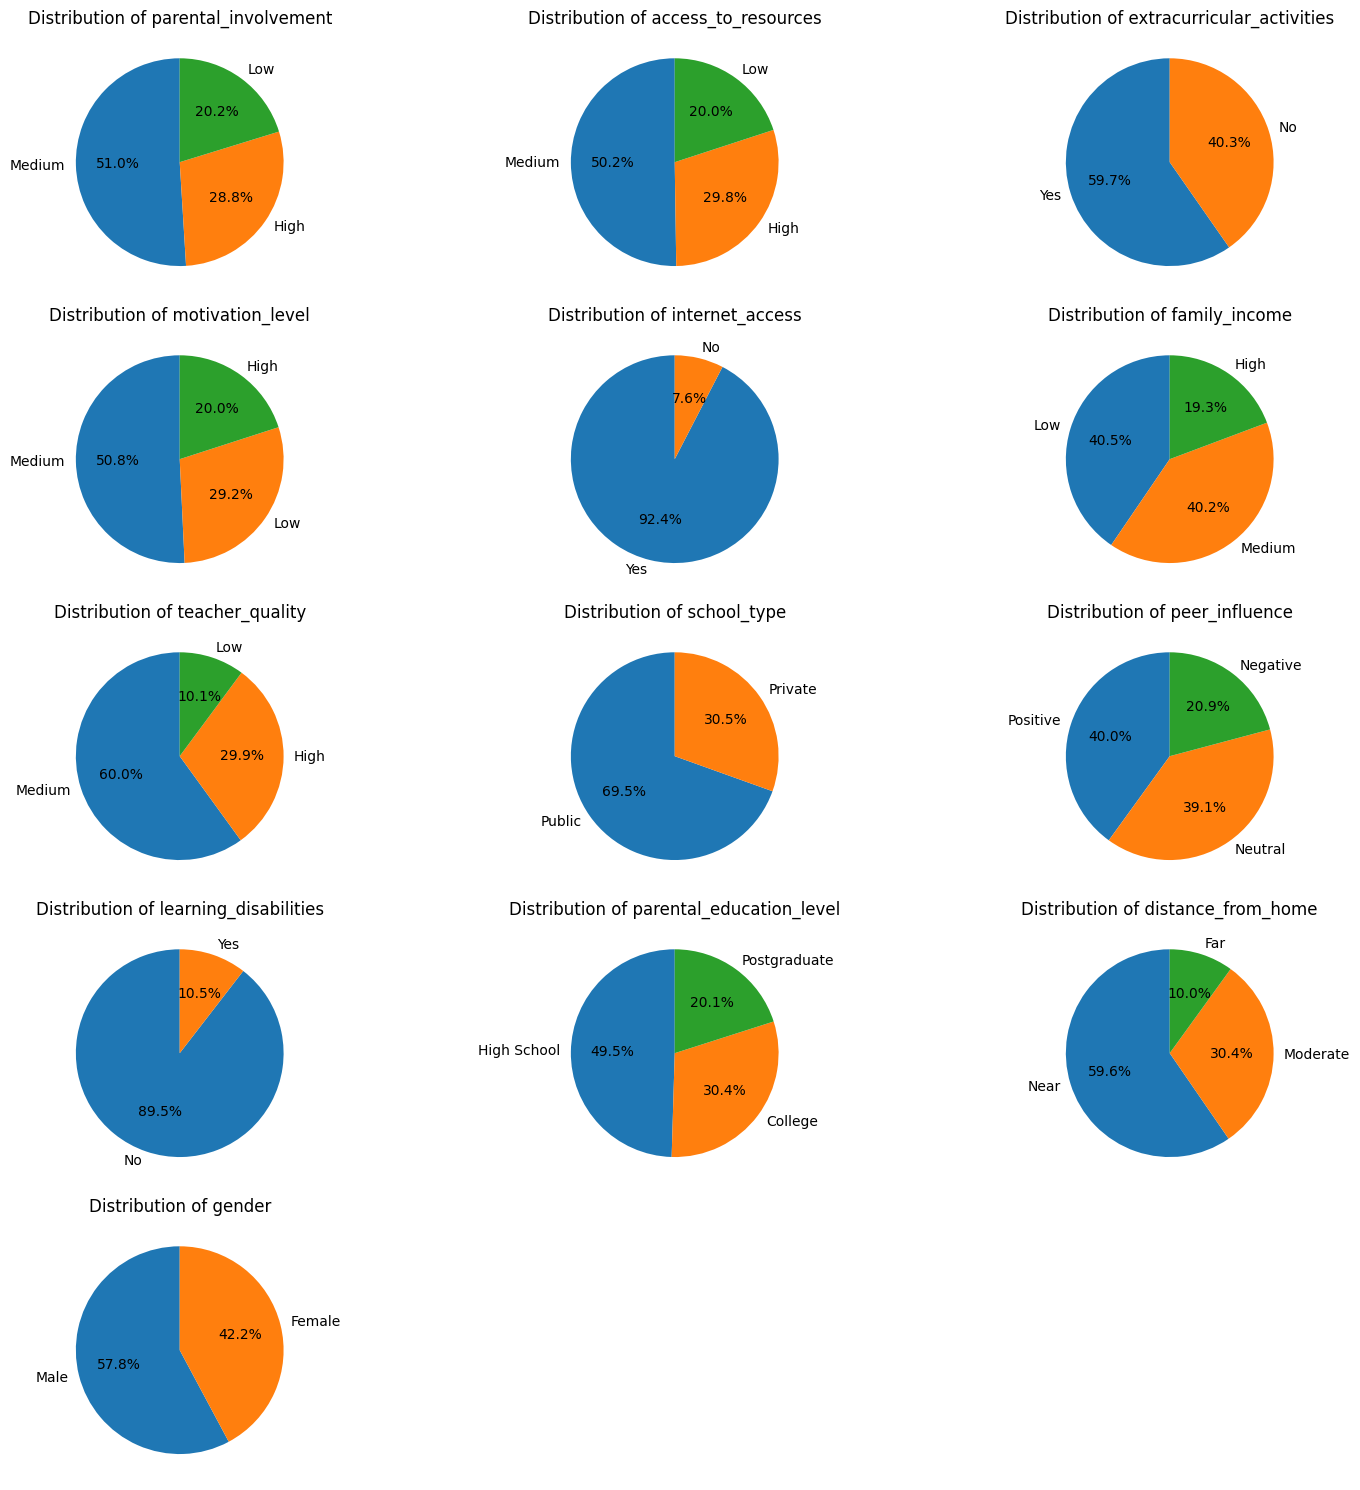

In [199]:
categories = [col for col in df_cat.columns if col != "exam_score"]
num_features = len(categories)

rows = 5
cols = (num_features + rows - 1) // rows

fig, axes = plt.subplots(rows, cols, figsize=(15, 15))
axes = axes.flatten()

i = 0
for col in categories:
    df_cat[col].value_counts().plot(kind='pie', ax=axes[i], autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_ylabel('')
    i += 1

for j in range(i, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



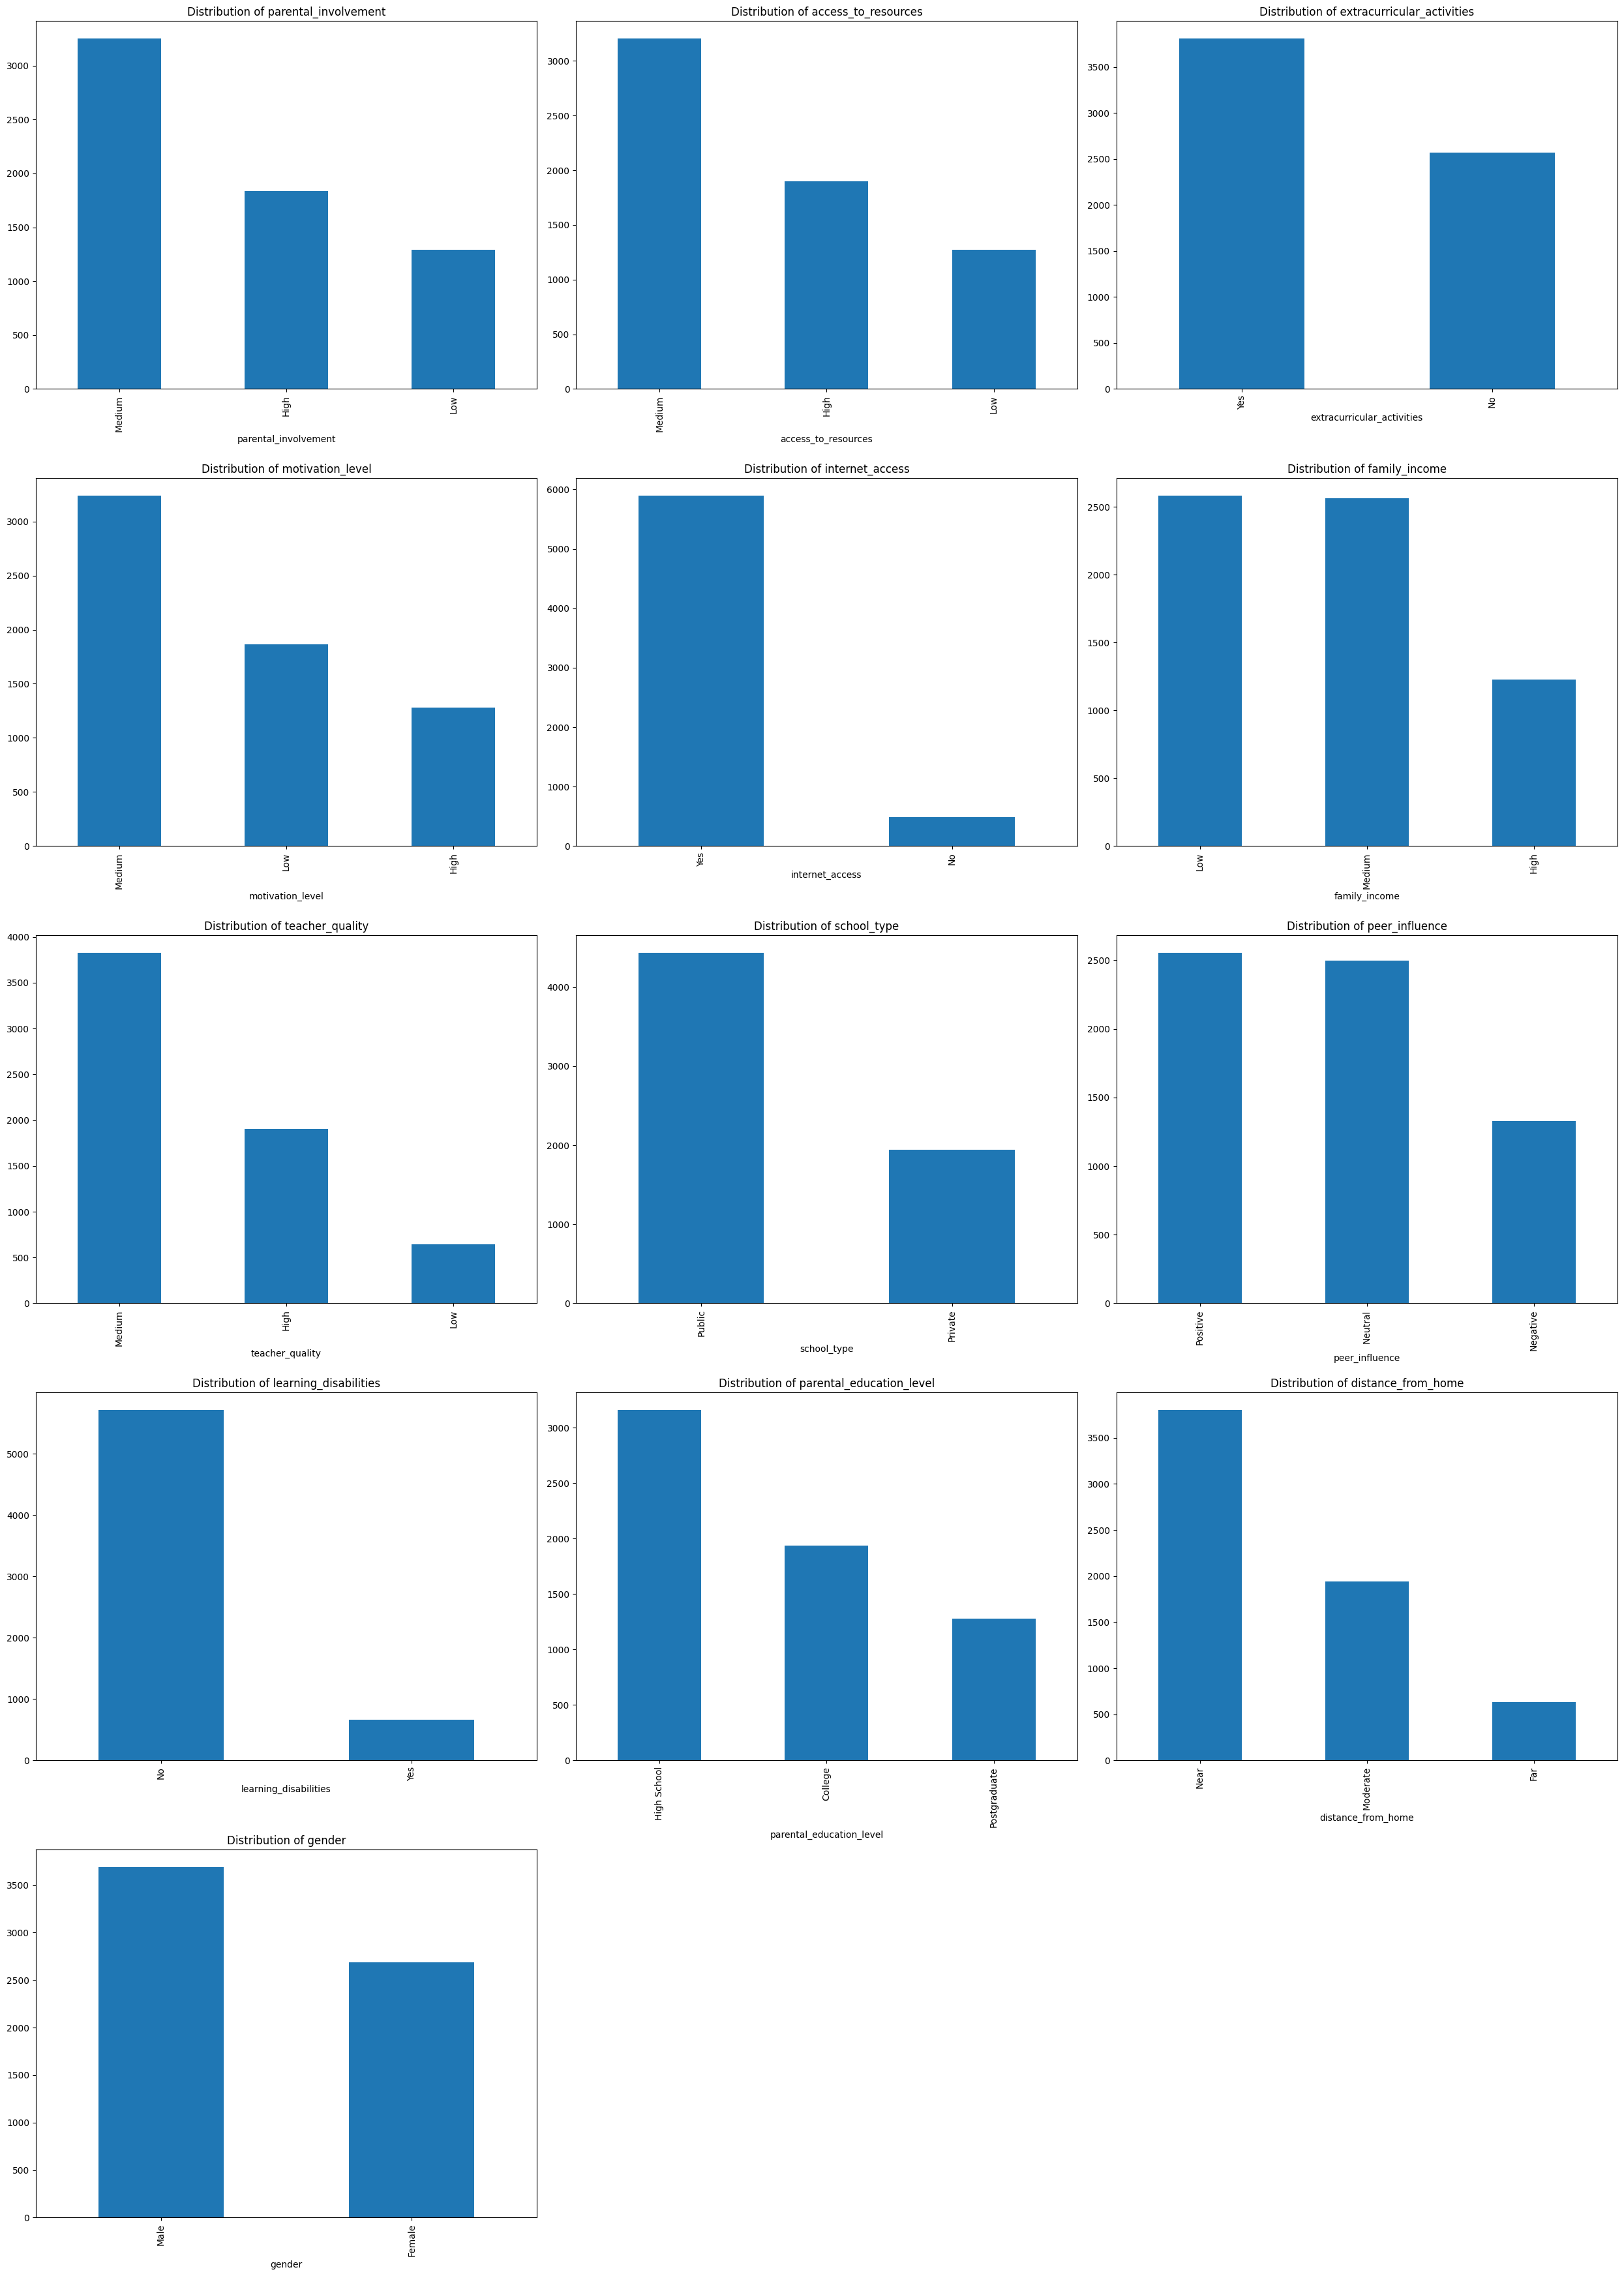

In [200]:
fig, axes = plt.subplots(rows, cols, figsize=(25, 35))
axes = axes.flatten()

i = 0
for col in categories:
    df_cat[col].value_counts().plot(kind='bar', ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_ylabel('')
    i += 1

for j in range(i, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

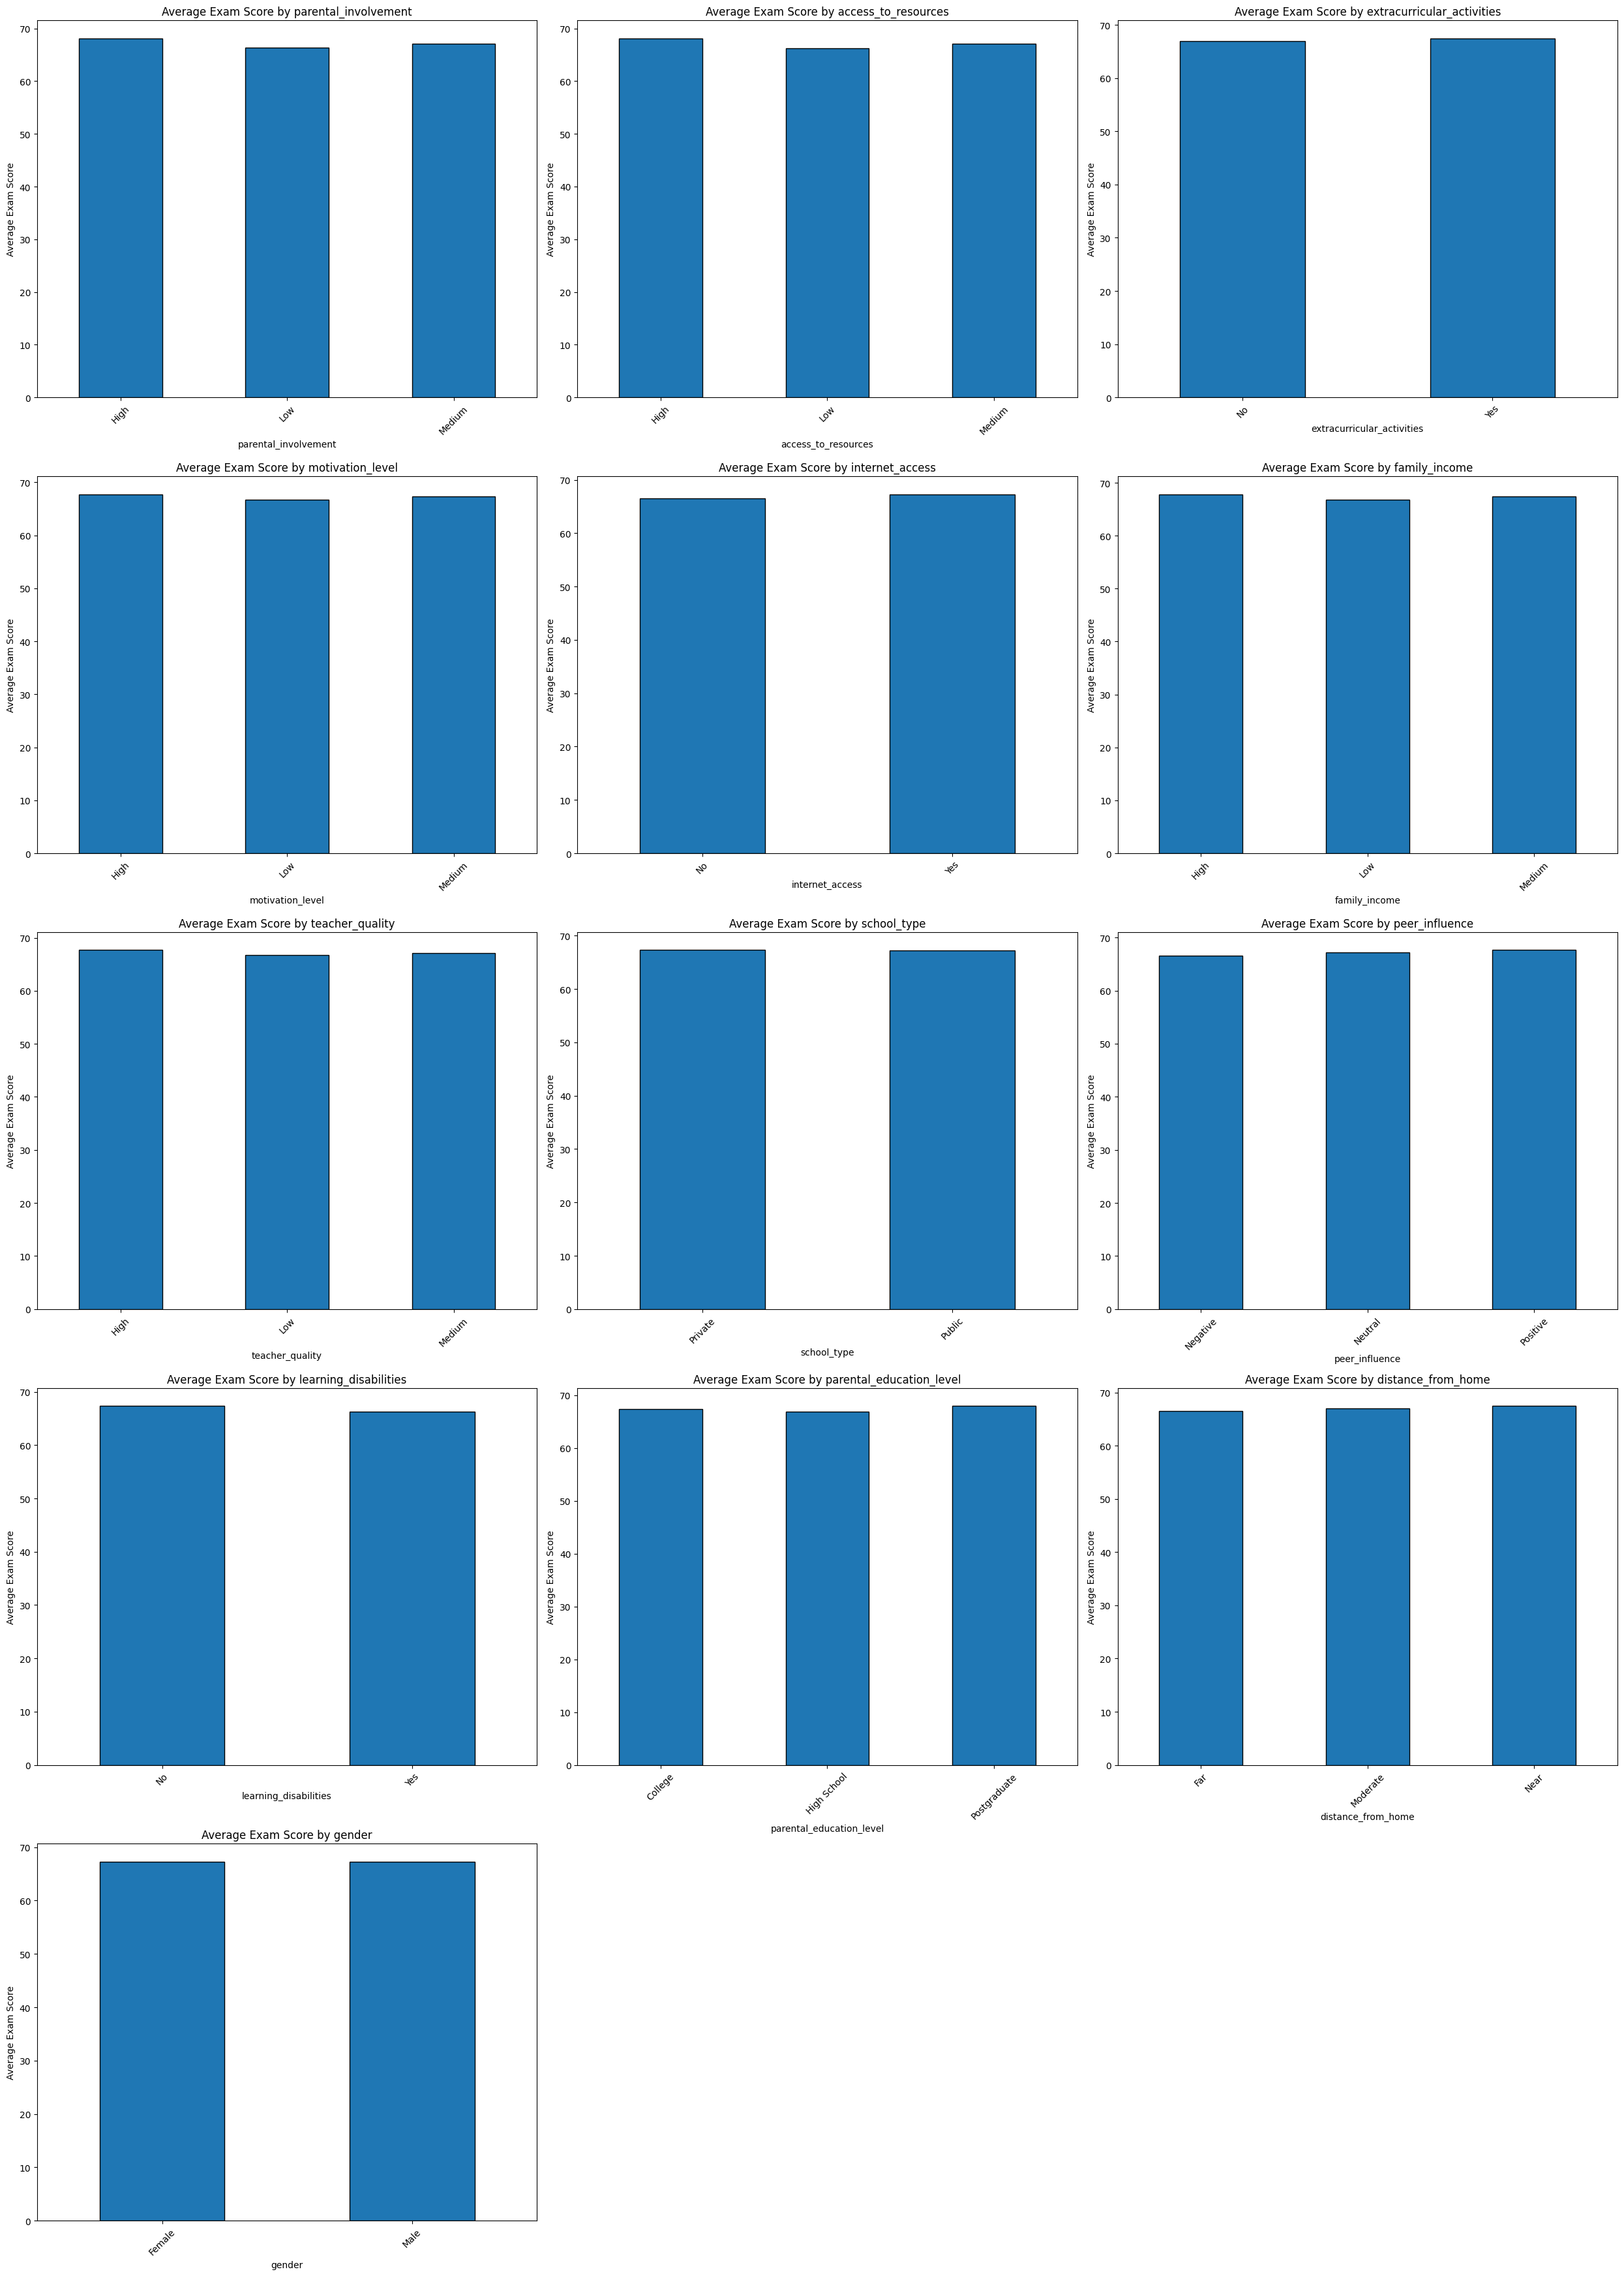

In [201]:
categories = [col for col in df_cat.columns if col != "exam_score"]
num_features = len(categories)

rows = 5
cols = (num_features + rows - 1) // rows

fig, axes = plt.subplots(rows, cols, figsize=(25, 35))
axes = axes.flatten()

for i, col in enumerate(categories):
    df.groupby(col)['exam_score'].mean().plot(kind='bar', ax=axes[i], edgecolor='black')
    axes[i].set_title(f"Average Exam Score by {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Average Exam Score")
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


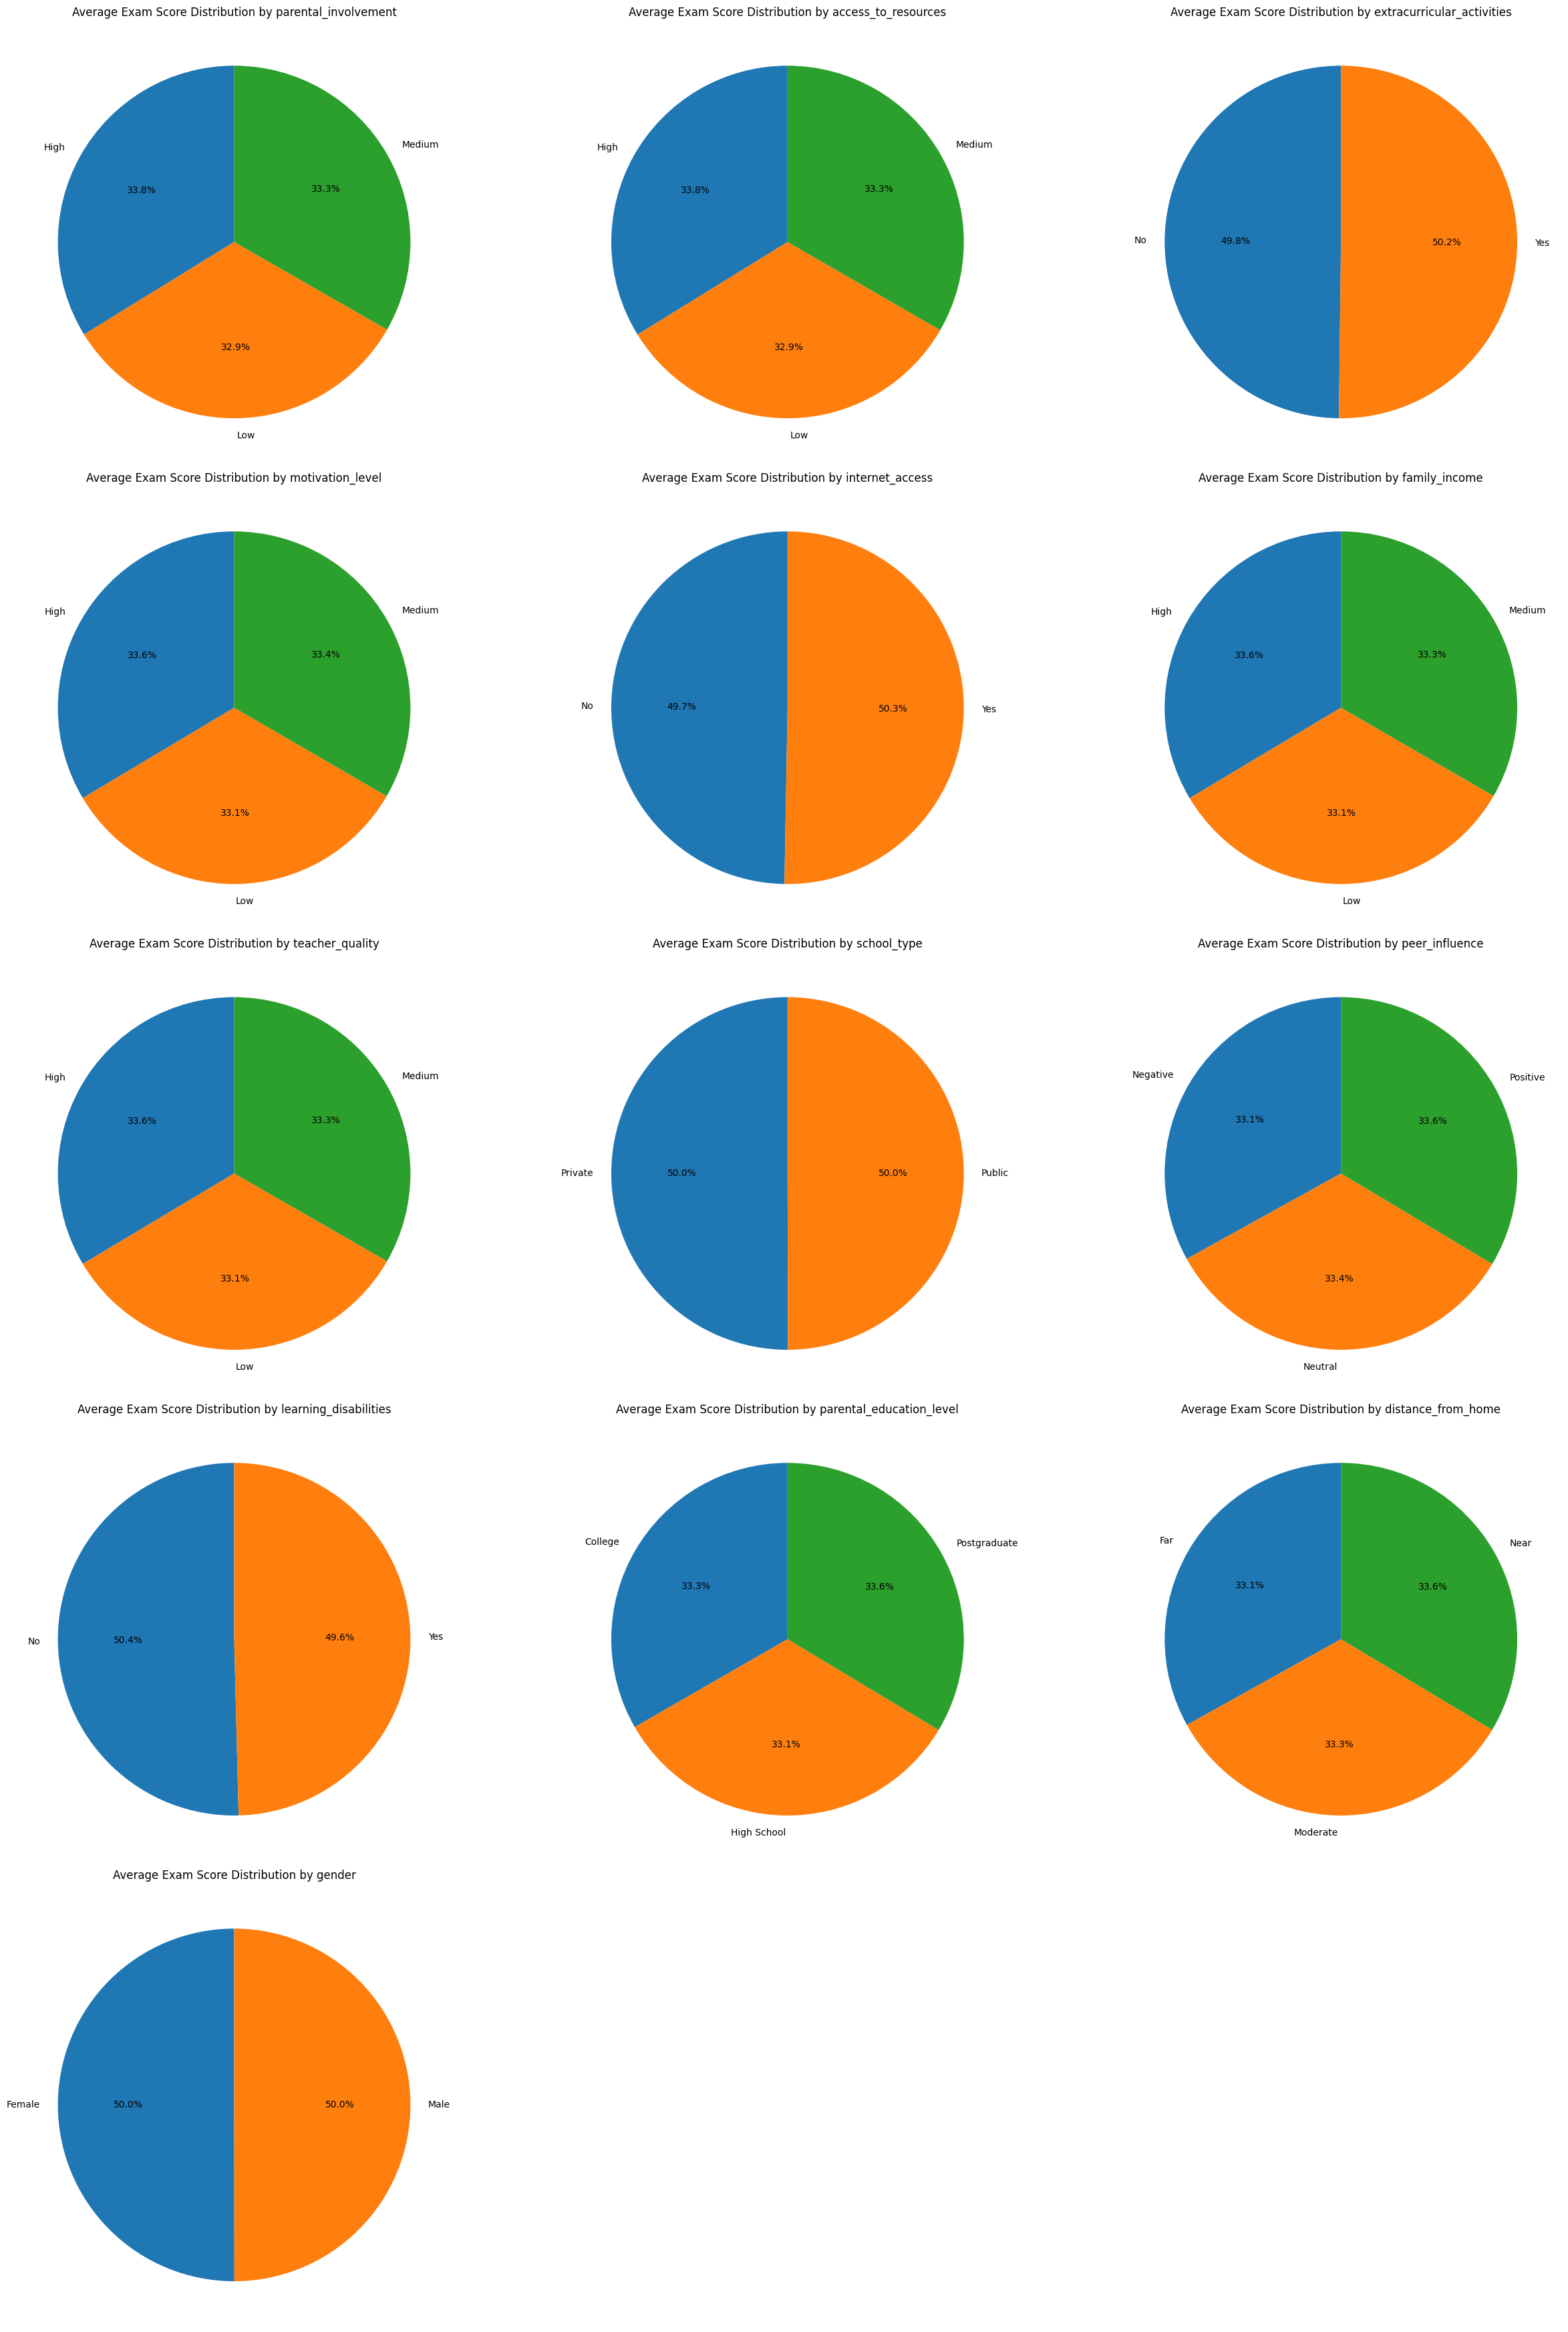

In [202]:
fig, axes = plt.subplots(rows, cols, figsize=(25, 35))
axes = axes.flatten()

for i, col in enumerate(categories):
    avg_scores = df.groupby(col)['exam_score'].mean()
    avg_scores.plot(kind='pie', ax=axes[i], autopct='%1.1f%%', startangle=90)

    axes[i].set_title(f"Average Exam Score Distribution by {col}")
    axes[i].set_ylabel('')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [219]:
df.head()

,hours_studied,attendance,parental_involvement,access_to_resources,extracurricular_activities,sleep_hours,previous_scores,motivation_level,internet_access,tutoring_sessions,family_income,teacher_quality,school_type,peer_influence,physical_activity,learning_disabilities,parental_education_level,distance_from_home,gender,exam_score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


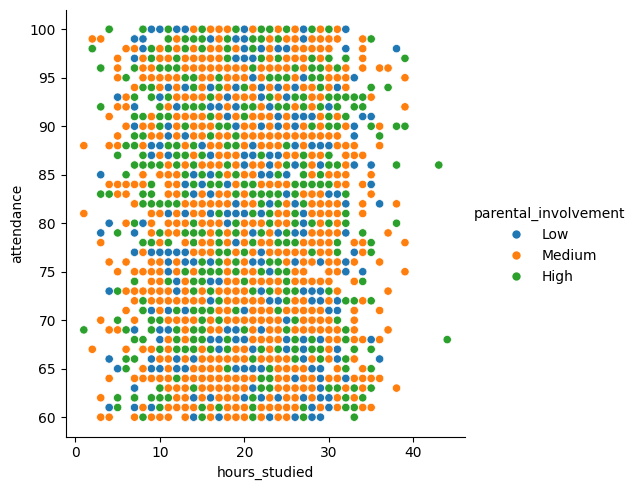

In [220]:
#Analysing the relationship between hours_studied and attendance and parental involvement
sns.relplot(data = df , x = 'hours_studied', y = 'attendance',hue = 'parental_involvement', kind = 'scatter')

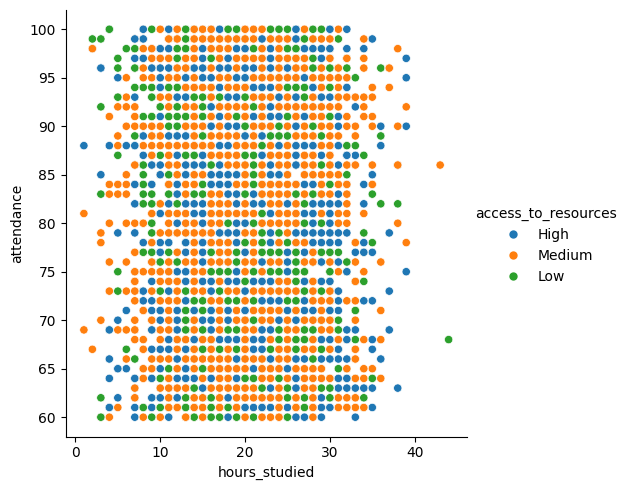

In [221]:
#Analysing the relationship between hours_studied and attendance and access to resources
sns.relplot(data = df , x = 'hours_studied', y = 'attendance',hue = 'access_to_resources', kind = 'scatter')

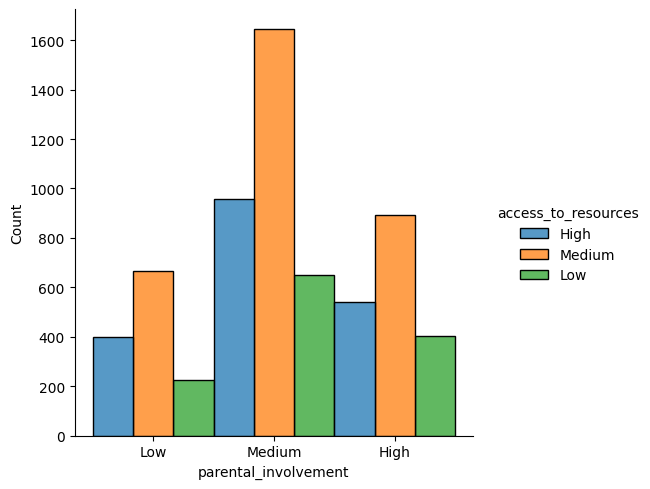

In [223]:
#parental involvement vs access to resources
sns.displot(data = df, x = 'parental_involvement', hue = 'access_to_resources', kind = 'hist', multiple = 'dodge')

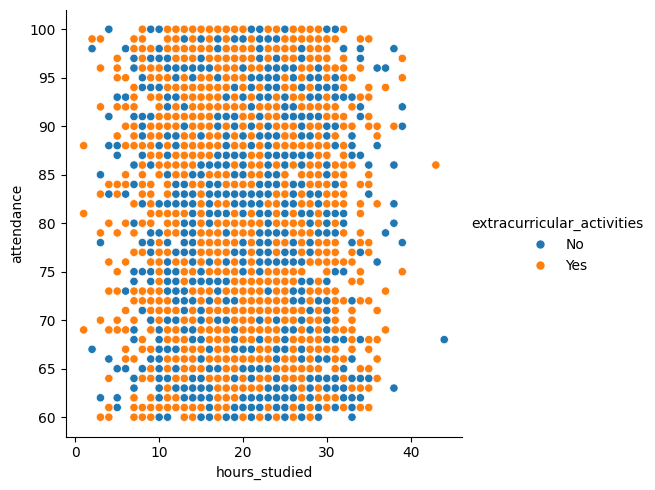

In [224]:
#hours_studied vs attendance vs extracurrircular acctivities
sns.relplot(data = df, x= 'hours_studied', y = 'attendance', hue = 'extracurricular_activities', kind = 'scatter')

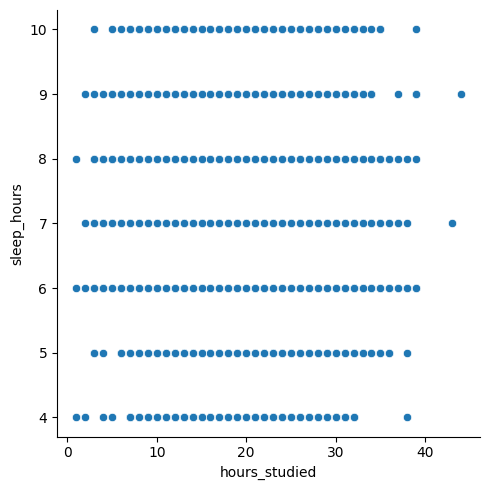

In [225]:
#sleep hours vs hours_studied
sns.relplot(data = df , x = 'hours_studied', y = 'sleep_hours', kind = 'scatter')

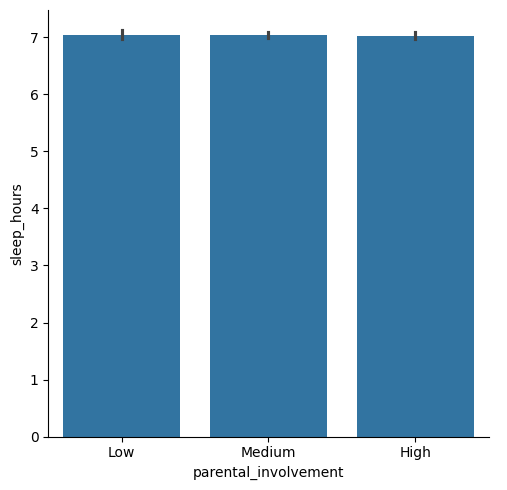

In [226]:
#Analysing the sleep hours impact with parental_involvement
sns.catplot(data = df, x = 'parental_involvement', y = 'sleep_hours', kind  = 'bar')

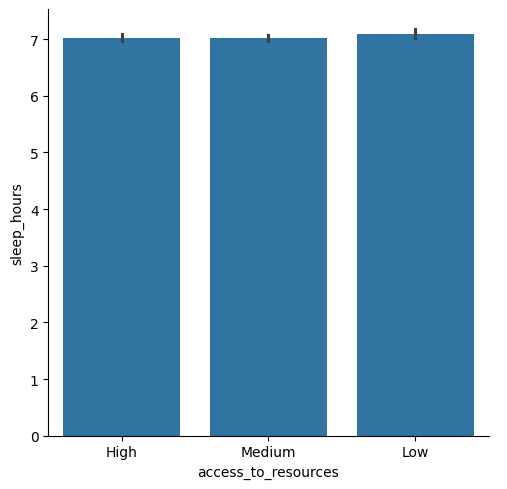

In [227]:
#Analysing the sleep hours impact with Access_to_Resources
sns.catplot(data = df, x = 'access_to_resources', y = 'sleep_hours', kind  = 'bar')

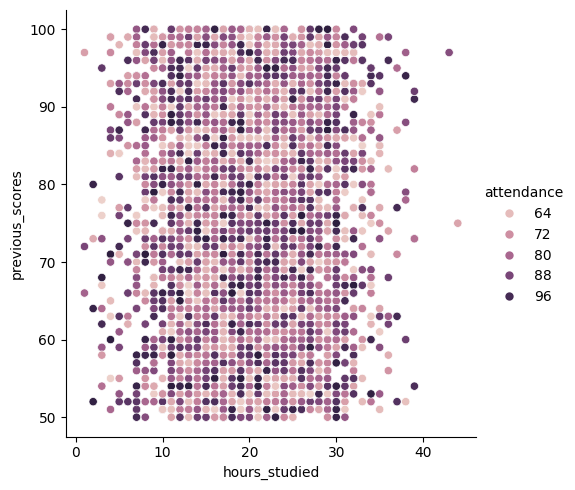

In [228]:
#analysing previous scores vs hours studied vs attendance
sns.relplot(data = df, x = 'hours_studied', y ='previous_scores', hue = 'attendance')

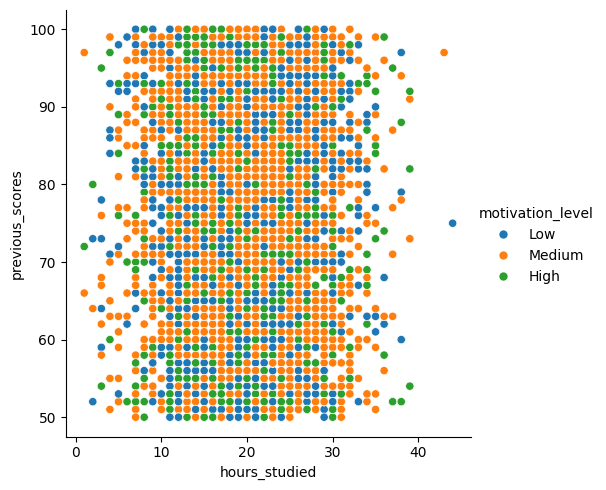

In [229]:
#analysing previous scores vs hours studied vs motivation
sns.relplot(data = df, x = 'hours_studied', y ='previous_scores', hue = 'motivation_level')

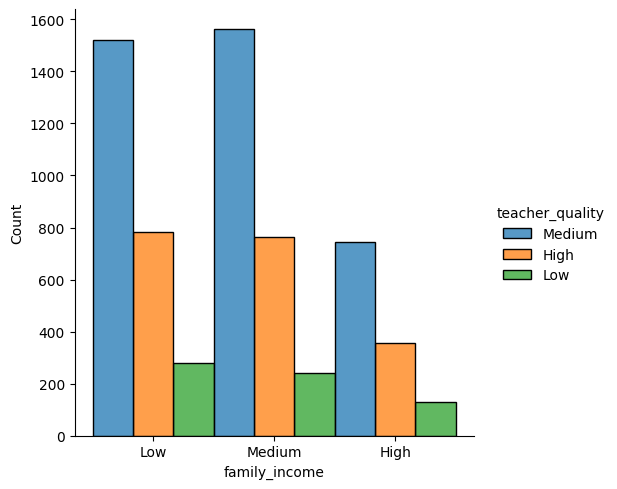

In [230]:
#analysing income vs quality of teacher
sns.displot(data = df, x = 'family_income',hue = 'teacher_quality',multiple='dodge')

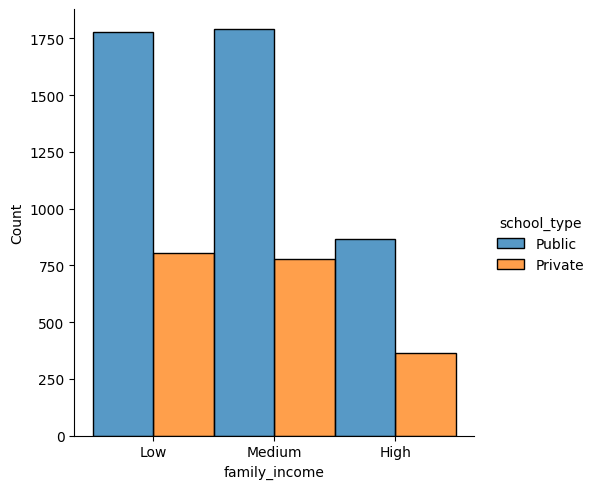

In [231]:
#analysing income vs type of school
sns.displot(data = df, x = 'family_income',hue = 'school_type',multiple='dodge')

<Axes: xlabel='peer_influence', ylabel='previous_scores'>

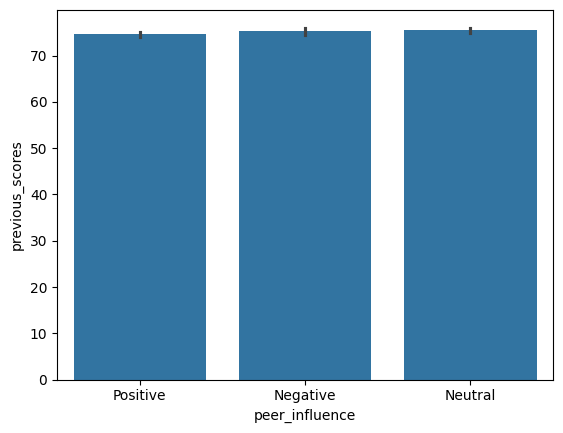

In [237]:
#peer influence vs marks
sns.barplot(data = df, x = 'peer_influence', y ='previous_scores')

<Axes: xlabel='physical_activity', ylabel='hours_studied'>

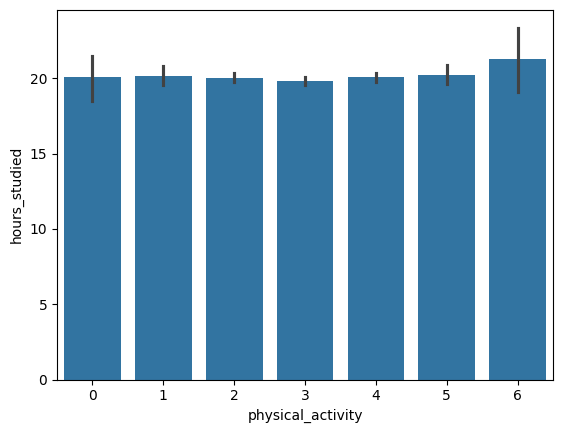

In [241]:
#study hours vs physcial activity
sns.barplot(data = df, x = 'physical_activity', y ='hours_studied')

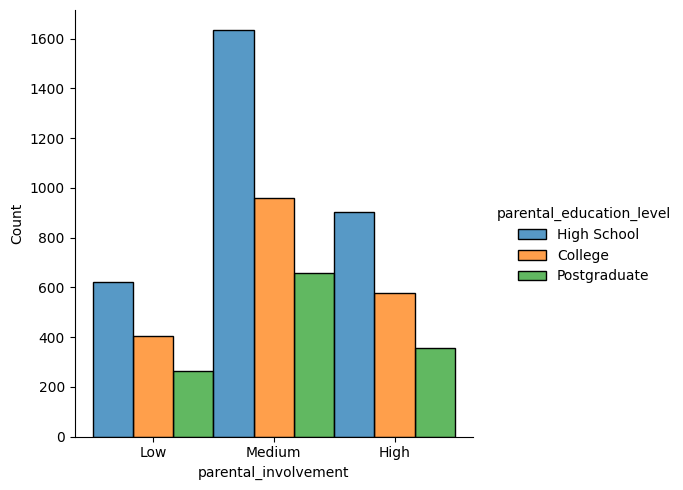

In [242]:
#parental involvement vs their education
sns.displot(data = df, x = 'parental_involvement', hue = 'parental_education_level', multiple = 'dodge')

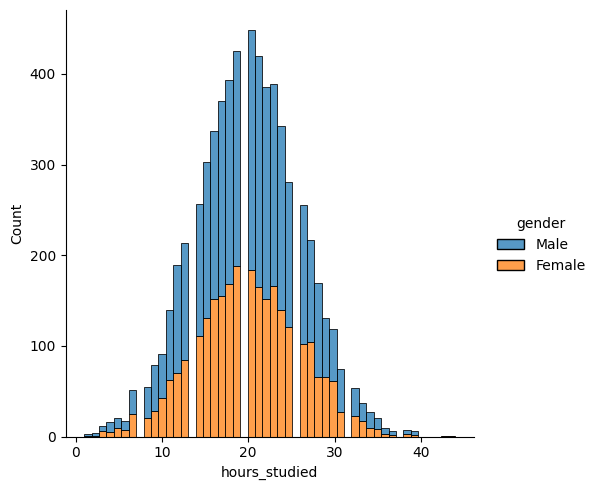

In [243]:
#gender vs study hours
sns.displot(data = df, x = 'hours_studied', hue = 'gender', multiple ='stack' )

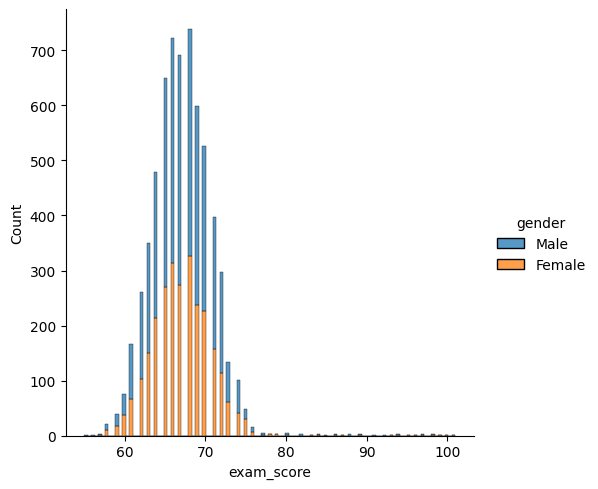

In [244]:
#gender vs marks
sns.displot(data = df, x = 'exam_score',hue = 'gender',multiple='stack' )

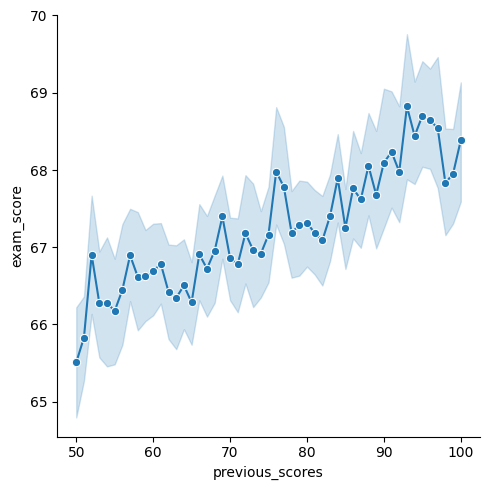

In [246]:
#previous marks vs current marks
sns.relplot(data=df, x='previous_scores', y='exam_score', kind = 'line',marker = 'o')